# PME3481 - Controle e Aplicações

## Método Gráfico - Root Locus

Lugar das Raízes - Método gráfico para observar a margem de ganho de um sistema dinâmico, especificamente a função de transferência escolhida, e verificar, dessa forma, as condições de estabilidade do sistema.

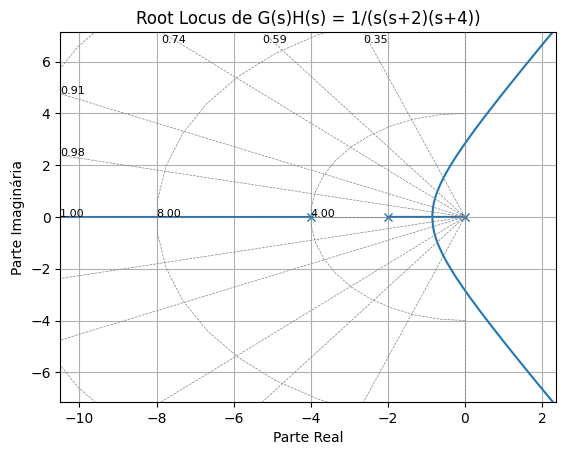

In [6]:
import matplotlib.pyplot as plt
import control as ctrl

# Definindo a função de transferência
num = [1]  # Numerador
den = [1, 6, 8, 0]  # Denominador: s^3 + 6s^2 + 8s

# Criando a função de transferência
sys = ctrl.TransferFunction(num, den)

# Plotando o root locus
ctrl.rlocus(sys)
plt.title('Root Locus de G(s)H(s) = 1/(s(s+2)(s+4))')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid(True)
plt.show()

In [7]:
from sympy import symbols, solve

# Definindo as variáveis
K = symbols('K')

# Coeficientes do polinômio característico
a0 = 6 * K
a1 = 4 + 5 * K
a2 = 13 + K
a3 = 15
a4 = 7
a5 = 1

# Primeira coluna da Tabela de Routh
r1_3 = (a3 * a4 - a5 * a2) / a4
r1_3_expr = (a3 * a4 - a5 * (13 + K)) / a4

r1_4 = (a3 * a1 - a5 * a0) / a4
r1_4_expr = (a3 * (4 + 5 * K) - a5 * (6 * K)) / a4

# Resolvendo para r1_3 e r1_4
r1_3_val = r1_3.subs({a3: 15, a4: 7, a5: 1, a2: (13 + K)})
r1_4_val = r1_4.subs({a3: 15, a4: 7, a5: 1, a1: (4 + 5 * K), a0: (6 * K)})

# Examinando a expressão para estabilidade
K_crit = solve(r1_3_val > 0, K)

# Calcular o valor crítico de K
r1_3_val_expr = (105 - 13 - K) / 7
r1_4_val_expr = (15 * (4 + 5 * K) - 6 * K) / 7

# Resolve para K crítico
K_max = solve(r1_3_val_expr > 0, K)
K_max

(-oo < K) & (K < 92)